
# Firm valuation with exit option.


In [1]:
import numpy as np
import quantecon as qe
from collections import namedtuple
import matplotlib.pyplot as plt

## Successive Approximation

First, here's a function that does successive approximation:

In [2]:
"Implements successive approximation."
def successive_approx(T,                     # Operator (callable)
                      x_0,                   # Initial condition
                      tolerance=1e-6,        # Error tolerance
                      max_iter=10_000,       # Max iteration bound
                      print_step=25,         # Print at multiples
                      verbose=False):        
    x = x_0
    error = np.inf
    k = 1
    while error > tolerance and k <= max_iter:
        x_new = T(x)
        error = np.max(np.abs(x_new - x))
        if verbose and k % print_step == 0:
            print(f"Completed iteration {k} with error {error}.")
        x = x_new
        k += 1
    if k < max_iter:
        print(f"Terminated successfully in {k} iterations.")
    else:
        print(f"Warning: Iteration hit max_iter bound {max_iter}.")
    return x

Let's test it on the Solow growth model

$$ k_{t+1} = g(k_t) \quad \text{where} \quad g(k) = s A k^\alpha + (1-\delta) k $$

The fixed point is $k^* = (sA/\delta)^{1/(1-\alpha)}$

In [3]:
Model = namedtuple("Model", ("s", "A", "α", "δ"))

def create_solow_model(s=0.5, A=1.0, α=0.3, δ=0.1):
    return Model(s=s, A=A, α=α, δ=δ)

In [4]:
def f(k, model):
    s, A, α, δ = model.s, model.A, model.α, model.δ
    return s * A * k**α + (1 - δ) * k

def steady_state(model):
    s, A, α, δ = model.s, model.A, model.α, model.δ
    return (s * A / δ)**(1/(1-α))

In [5]:
model = create_solow_model()

In [6]:
steady_state(model)

9.966176578193442

In [7]:
successive_approx(lambda k: f(k, model), 1.0)

Terminated successfully in 190 iterations.


9.966163661066052

## Firm Valuation with Exit

In [8]:
Model = namedtuple("Model", ("z_vals", "Q", "β", "s")) 

In [9]:
def create_exit_model(
        n=200,                  # productivity grid size
        ρ=0.95, μ=0.1, ν=0.1,   # persistence, mean and volatility
        β=0.98, s=100.0         # discount factor and scrap value
        ):
    mc = qe.tauchen(ρ, ν, μ, n=n)
    z_vals, Q = mc.state_values, mc.P
    return Model(z_vals=z_vals, Q=Q, β=β, s=s)

In [10]:
" The Bellman operator Tv = max{s, π + β Q v}."
def T(v, model):
    z_vals, Q, β, s = model.z_vals, model.Q, model.β, model.s
    h = z_vals + β * Q @ v
    return np.maximum(s, h)

In [11]:
" Get a v-greedy policy."
def get_greedy(v, model):
    z_vals, Q, β, s = model.z_vals, model.Q, model.β, model.s
    σ = s >= z_vals + β * Q @ v
    return σ

In [12]:
" Compute value of the firm without exit option."
def no_exit_value(model):
    z_vals, Q, β, s = model.z_vals, model.Q, model.β, model.s
    n = len(z_vals)
    I = np.identity(n)
    return # put missing code here

In [13]:
"Solve by VFI."
def vfi(model):
    v_init = no_exit_value(model)
    v_star = # put missing code here
    σ_star = get_greedy(v_star, model)
    return v_star, σ_star

### Plots

First let's plot the value function $v^*$ and the no-exit value function

Terminated successfully in 315 iterations.


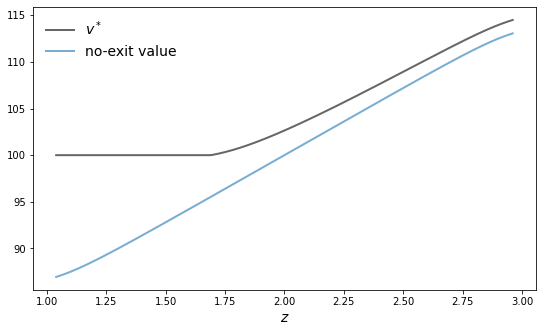

In [14]:
fontsize=14
fig, ax = plt.subplots(figsize=(9, 5.2))

model = create_exit_model()
z_vals, Q, β, s = model.z_vals, model.Q, model.β, model.s

v_star, σ_star = vfi(model)
w = no_exit_value(model)

ax.plot(z_vals, v_star, "k-", lw=2, alpha=0.6, label="$v^*$")
ax.plot(z_vals, w, lw=2, alpha=0.6, label="no-exit value")

ax.legend(frameon=False, fontsize=fontsize)
ax.set_xlabel("$z$", fontsize=fontsize)

plt.show()

Now plot the optimal policy.

Terminated successfully in 315 iterations.


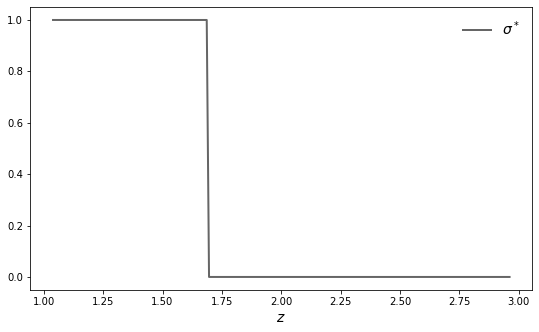

In [15]:
fontsize=14
fig, ax = plt.subplots(figsize=(9, 5.2))

# Put missing code here

plt.show()